![alt text](image-11.png)

![alt text](image-12.png)

In [2]:
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

![alt text](image-2.png)

------------------------------------------------------------------------------------------------------------------------------------------------

![alt text](image-3.png)

/tmp/ipykernel_10019/1520214117.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return (x**2) / (np.exp(x) - 1)


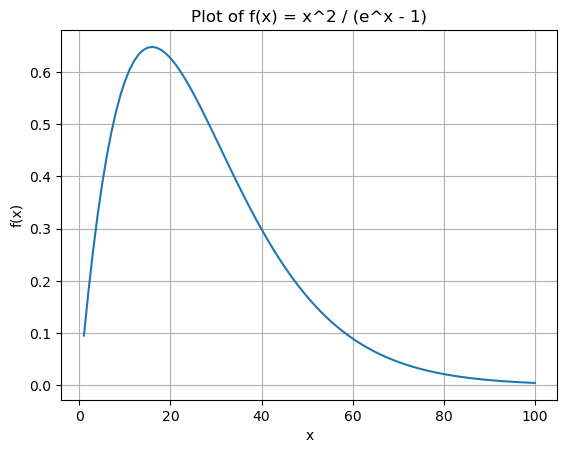

Quadratura: 0.986157827331462
trapezio: 0.9783205040882498


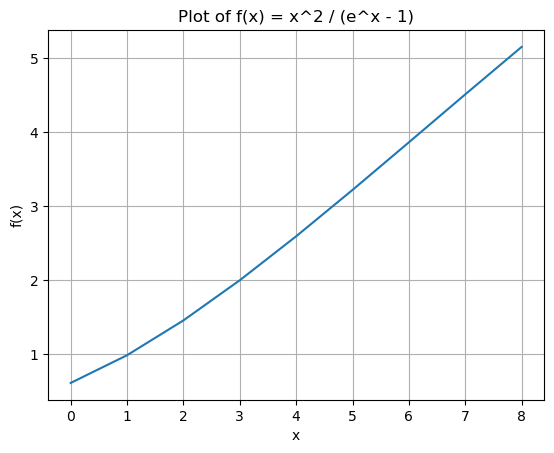

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2) / (np.exp(x) - 1)

pontos = []
x = 0
while x <= 10:
    pontos.append(f(x))
    x += 0.1

plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


#quadratura
N = 3
a = 0.0
b = 2.0
# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
# Perform the integration

pontos = []
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k]) 
    pontos.append(s)
print(f'Quadratura: {s}')


# Numerical integration using the trapezoidal rule
N = 10
a = 0.1
b = 2.0
h = (b-a)/N
s = 0.5*f(a) + 0.5*f(b)

pontos = []
for k in range(1,N):
    s += f(a+k*h)
    pontos.append(s)
print(f'trapezio: {h*s}')


plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------

![alt text](image-4.png)

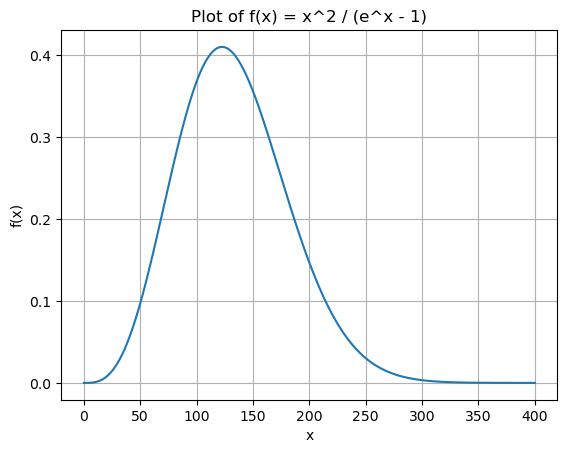

Quadratura: 0.4662034550560857
trapezio: 0.45300378157148813


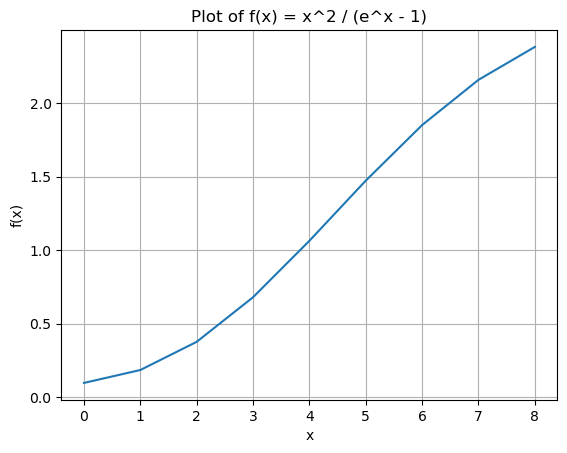

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 * np.exp(-x**2)

pontos = []
x = 0
while x <= 4:
    pontos.append(f(x))
    x += 0.01

plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


#quadratura
N = 3
a = 0.0
b = 2.0
# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
# Perform the integration

pontos = []
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k]) 
    pontos.append(s)
print(f'Quadratura: {s}')


# Numerical integration using the trapezoidal rule
N = 10
a = 0.1
b = 2.0
h = (b-a)/N
s = 0.5*f(a) + 0.5*f(b)

pontos = []
for k in range(1,N):
    s += f(a+k*h)
    pontos.append(s)
print(f'trapezio: {h*s}')


plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------

![![alt text](image-6.png)](attachment:image.png)
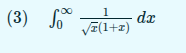

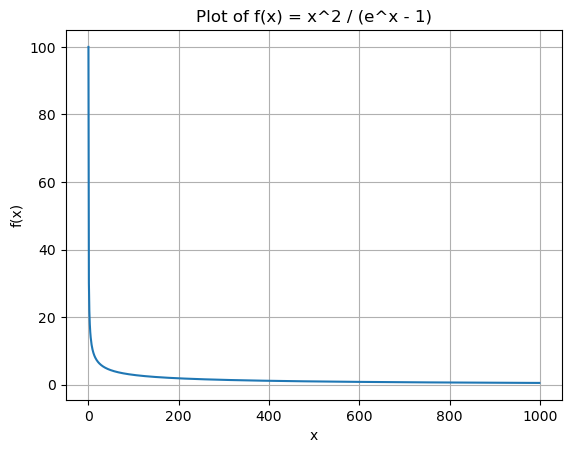

Quadratura: 1.549673782923239
trapezio: 1.3426884771011312


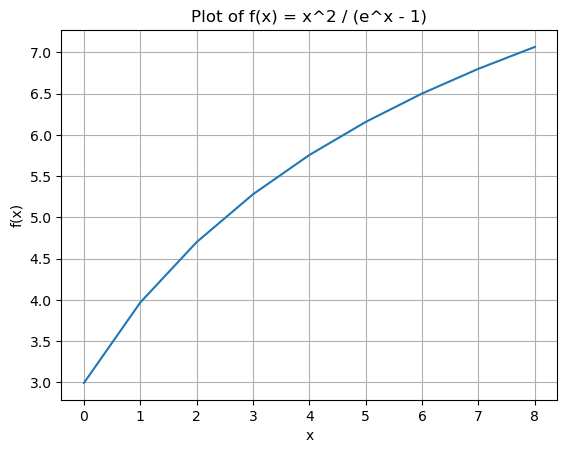

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (x**(1/2) * (1+x))

pontos = []
x = 0.0001
while x <= 1:
    pontos.append(f(x))
    x += 0.001

plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

#quadratura
N = 3
a = 0.0
b = 2.0
# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
# Perform the integration

pontos = []
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k]) 
    pontos.append(s)
print(f'Quadratura: {s}')

# Numerical integration using the trapezoidal rule
N = 10
a = 0.1
b = 2.0
h = (b-a)/N
s = 0.5*f(a) + 0.5*f(b)

pontos = []
for k in range(1,N):
    s += f(a+k*h)
    pontos.append(s)
print(f'trapezio: {h*s}')


plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------

![alt text](image-8.png)

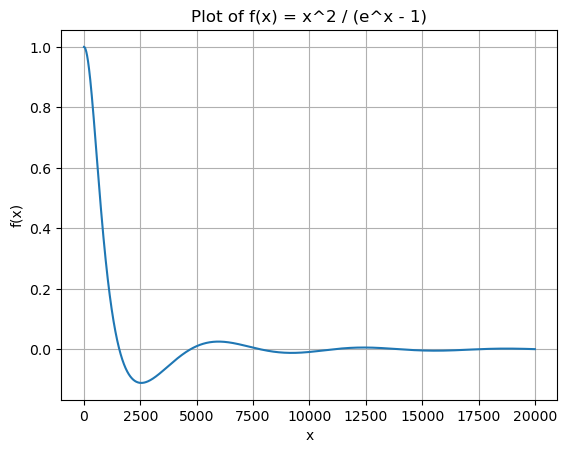

Quadratura: 0.7283555809938291
trapezio: 0.7281505919544462


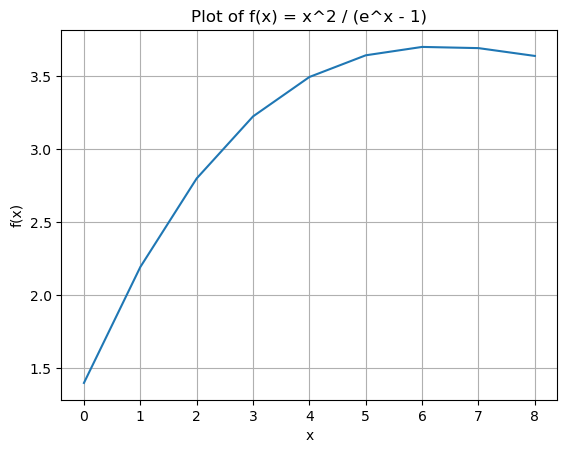

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.cos(x) / (1 + x**2)

pontos = []
x = 0.0001
while x <= 20:
    pontos.append(f(x))
    x += 0.001

plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

#quadratura
N = 3
a = 0.0
b = 2.0
# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
# Perform the integration

pontos = []
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k]) 
    pontos.append(s)
print(f'Quadratura: {s}')


# Numerical integration using the trapezoidal rule
N = 10
a = 0.0
b = 2.0
h = (b-a)/N
s = 0.5*f(a) + 0.5*f(b)

pontos = []
for k in range(1,N):
    s += f(a+k*h)
    pontos.append(s)
print(f'trapezio: {h*s}')


plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------

![alt text](image-10.png)

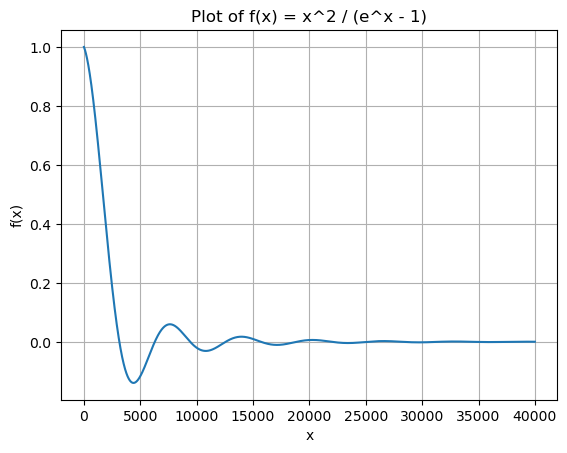

Quadratura: 1.4721100050845646
trapezio: 1.371875453854845


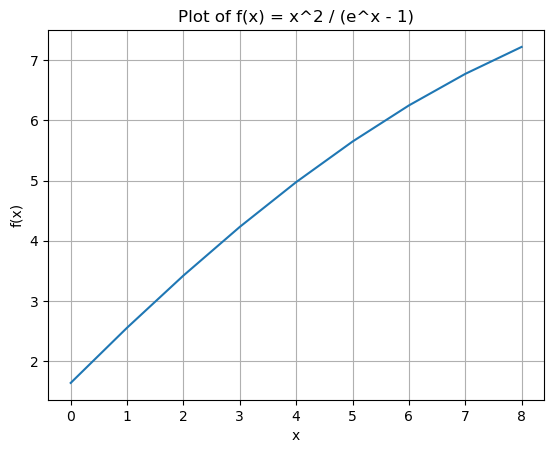

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) * np.exp(-0.1*x) * x**-1

pontos = []
x = 0.0001
while x <= 40:
    pontos.append(f(x))
    x += 0.001

plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()



#quadratura
N = 3
a = 0.0
b = 2.0
# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
# Perform the integration

pontos = []
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k]) 
    pontos.append(s)
print(f'Quadratura: {s}')


# Numerical integration using the trapezoidal rule
N = 10
a = 0.1
b = 2.0
h = (b-a)/N
s = 0.5*f(a) + 0.5*f(b)

pontos = []
for k in range(1,N):
    s += f(a+k*h)
    pontos.append(s)
print(f'trapezio: {h*s}')


plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------